<a href="https://colab.research.google.com/github/gencross/NewtonGroup1/blob/main/Miles_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from numpy.polynomial.polynomial import polyder
from numpy.polynomial.polynomial import polyval
from numpy.polynomial.polynomial import polyroots
from PIL import Image
from PIL import ImageColor

In [ ]:
def newton(P, start, steps=100):
    root = start
    P_deriv = polyder(P)
    for i in range(steps):
        root = root - (polyval(root,P) / polyval(root,P_deriv))
    return root

In [ ]:
real_min = -1
real_max = 1
imag_min = -1
imag_max = 1
resolution = 5000

x_array = np.linspace(real_min,real_max, resolution * (real_max-real_min) )
y_array = np.linspace(imag_min,imag_max, resolution * (imag_max-imag_min) )

c_array = np.add.outer(x_array,y_array*1j)
I = newton([1,0,0,1], c_array)
c_array.shape

(10000, 10000)

In [ ]:
fractal = np.zeros((10000, 10000, 3), dtype=np.uint8)

for x in range(10000):
    for y in range(10000):
        if I[x,y] == -1. +0.j:
            fractal[y,x] = [255,0,0]
        if I[x,y].imag > 0:
            fractal[y,x] = [0,255,0]
        if I[x,y].imag < 0:
            fractal[y,x] = [0,0,255]

img = Image.fromarray(fractal)
display(img)

In [ ]:
real_min = -0.3
real_max = -0.2
imag_min = -0.05
imag_max = 0.05
resolution = 100000

x_array = np.linspace(real_min,real_max, int(resolution * (real_max-real_min))+1 )
y_array = np.linspace(imag_min,imag_max, int(resolution * (imag_max-imag_min)) )

c_array = np.add.outer(x_array,y_array*1j)
I = newton([-1,2,8,4],c_array)
c_array.shape

(10000, 10000)

In [ ]:
fractal = np.zeros((10000,10000,3), dtype=np.uint8)
for x in range(10000):
  for y in range(10000):
    if I[x,y].real <= -1.5:
      fractal[y,x] = [255,0,0]
    if (I[x,y].real >= -0.7) and (I[x,y].real <= 0):
      fractal[y,x] = [0,255,0]
    if I[x,y].real > 0:
      fractal[y,x] = [0,0,255]

img = Image.fromarray(fractal)
display(img)

In [197]:
def color_picker(x,min,max):
  if (x >= 0) and  (x <= 5):
    x *= 0.2
    return np.around([0, 36 + (174 * x), 180 * x])
  elif (x < 0) and  (x >= -5):
    x *= -0.2
    return np.around([0, 180 * x, 36 + (174 * x)])
  elif x > 0:
    x /= min
    return np.around([0, 210 + (45 * x), 180 + (75 * x)])
  else:
    x /= max
    return np.around([0, 180 + (75 * x), 210 + (45 * x)])

In [150]:
def newton_sin(start, steps=100):
    root = start
    for i in range(steps):
        root = root - np.tan(root)
    return root

In [195]:
real_min = -0.63 * np.pi
real_max = -0.37 * np.pi
imag_min = -0.06 * np.pi
imag_max = 0.06 * np.pi
resolution = 1500

x_array = np.linspace(real_min,real_max, int(resolution * (real_max-real_min)))
y_array = np.linspace(imag_max,imag_min, int(resolution * (imag_max-imag_min)))

c_array = np.add.outer(x_array,y_array*1j)
I = newton_sin(c_array)
I = I.real
I /= np.pi
np.clip(I, -50, 50, out=I)
c_array.shape

(1225, 565)

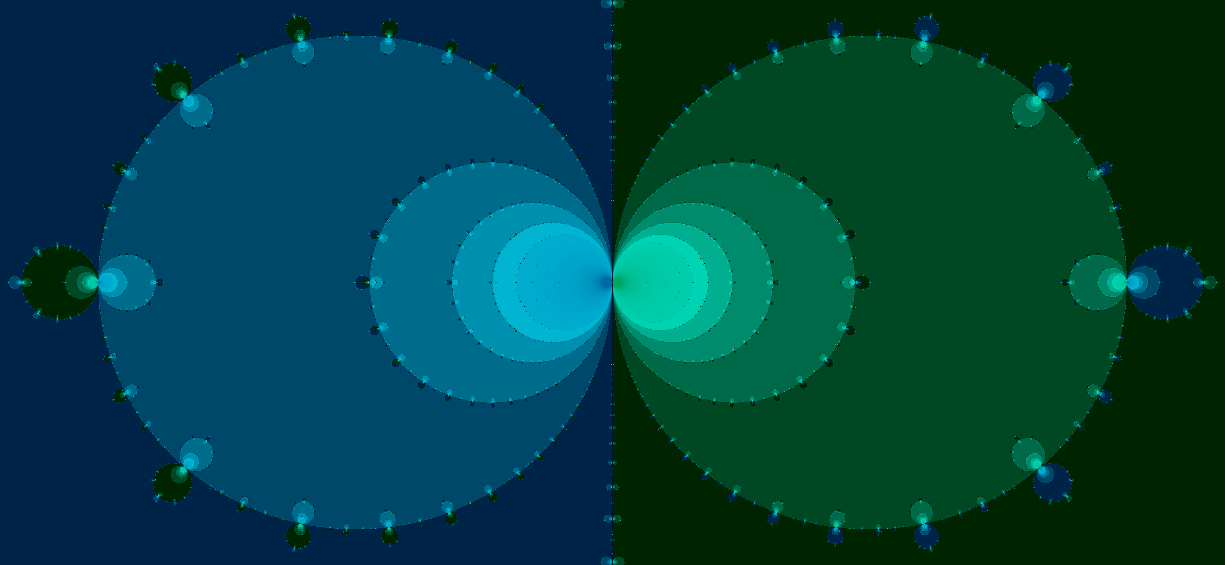

In [198]:
fractal = np.zeros((c_array.shape[1], c_array.shape[0], 3), dtype=np.uint8)
I_max = I.max()
I_min = I.min()
for x in range(c_array.shape[0]):
  for y in range(c_array.shape[1]):
    fractal[y,x] = color_picker(I[x,y], I_min, I_max)
img = Image.fromarray(fractal)
display(img)